# Connected Components

The purpose of this assignment is to familiarize yourself with the handling of graph data structures. You will implement depth-first search for identifying the connected components of an undirected graph, implementing procedure Search as a subroutine along the way.

You will use the [NetworkX](https://networkx.github.io/) Python package to represent and manipulate graphs. You should first familiarize yourself with its functionality by going through the brief [tutorial](http://networkx.github.io/documentation/networkx-1.9.1/tutorial/index.html). For this homework, you may only use the basic undirected graph methods listed [here](http://networkx.github.io/documentation/networkx-1.9.1/reference/classes.graph.html).

As a use case, we will work with a dataset recording the interactions between characters in Homer's *Iliad*.

In [1]:
import networkx
import urllib2
homer = urllib2.urlopen('http://people.sc.fsu.edu/~jburkardt/datasets/sgb/homer.dat')

The format of the data is straightforward. After some comment lines (beginning with \*), the file lists a codename for each character (i.e., node of the graph), followed by a description. The file then lists the groups of characters that interact in each chapter, from which you will form the edges. For instance, the first line has the form:

```1:CH,AG,ME,GS;AP,CH;HE,AC;AC,AG,CA;HE,AT;AT,AC;AT,OG;NE,AG,AC;CS,OD```

This means that CH,AG,ME,GS interacted, so there are edges for all pairs of these nodes. Groups of characters that interacted are separated by semicolons. The lines start with chapter information of the form `1:` or `&:`, which can be ignored for this problem.

First implement a function to read in the nodes from the input file. You may implement any auxiliary functions as needed, and are encouraged to use small functions with specific purposes to keep your code readable. Any function you implement should be clearly commented.

Next implement a function to read in the edges from the input file.

In [2]:
def read_nodes(gfile):
    """Reads in the nodes of the graph from the input file.
    
    Args:
        gfile: A handle for the file containing the graph data, starting at the top.
        
    Returns:
        A generator of the nodes in the graph, yielding a list of the form:
            ['CH', 'AG, 'ME', ...]
    """
    # TODO: implement function
    output = set()
    while True:
        line = gfile.readline()
        ###skip comments
        if(line.startswith('*')): continue
        ###stop once you hit double spaces
        if(line.startswith('\n')): break
        output.add(line[0:2])
    
    return list(output)

In [3]:
def read_edges(gfile):
    """Reads in the edges of the graph from the input file.
    
    Args:
        gfile: A handle for the file containing the graph data, starting at the top 
            of the edges section.
            
    Returns:
        A generator of the edges in the graph, yielding a list of pairs of the form:
            [('CH', 'AG'), ('AG', 'ME'), ...]
    """
    # TODO: implement function
    output = set()
    while True:
        line = gfile.readline()
        ###reached the end of the file
        if(line.startswith('*')): break
        ###clean line
        line = line[line.find(':')+1:line.find('\n')]
        ###split into groups of nodes
        groups = line.split(';')
        for group in groups: 
            ###iterate through node groups
            nodes = group.split(',')
            ###enumerate within a group of nodes
            for idx,node in enumerate(nodes):
                for idx2 in range(idx+1,(len(nodes))):
                    if(node[0:2]!=nodes[idx2][0:2]):
                        ###add frozen set so that order doesn't matter
                        output.add(frozenset((node[0:2],nodes[idx2][0:2])))
                        
    ###convert to pairs
    output2 = set()
    for i in output:
        output2.add(tuple(i))
    ###order does not matter for undirected graphs
    return list(output2)

The following code should now correctly create the graph.

In [4]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from(read_nodes(homer))
G.add_edges_from(read_edges(homer))

Next implement procedure Search. The function takes in a graph and a root node, and returns a list of the nodes visited during the search. The nodes should appear in the order in which they were *first visited*. The neighbors of a node should be processed in *alphabetical order*, where numbers come before letters. This will ensure that the output of your function is uniquely defined, given any input node.

In [6]:
def Search(graph, root):
    """Runs Search from vertex root in a graph. Neighboring nodes are processed in alphabetical order.
    
    Args:
        graph: the given graph, with nodes encoded as strings.
        root: the node from which to start the search.
        
    Returns:
        A list of nodes in the order in which they were first visited.
    """
    # TODO: implement function
    def traverse(graph, root, path):
        if root not in path:
            path.append(root)
            for node in sorted(graph[root]):
                traverse(graph,node,path)
        return path 
                
    return traverse(graph,root,[])

We will check the correctness of your code by verifying that it correctly computes the DFS tree starting at Ulysses (node `OD`).

In [7]:
ulysses = Search(G, 'OD')

Next implement DFS to find the connected components of the character graph. When choosing roots for your components, always pick the *smallest unvisited node* according to alphabetical ordering. Combined with your Search routine, this will ensure that the output is again uniquely defined.

In [8]:
def connected_components(graph):
    """Computes the connected components of the given graph.
    
    Args: 
        graph: the given graph, with nodes encoded as strings.
        
    Returns:
        The connected components of the graph. Components are listed in
        alphabetical order of their root nodes.
    """
    # TODO: implement function
    all_nodes = sorted(G.nodes().keys())
    ccp = []
    for nodes in all_nodes:
        init = False
        for sublist in ccp:
            if nodes in sublist:
                init = True
        if not init:
            ccp.append(Search(G,nodes))
    return ccp

We will check correctness of your code by verifying that your output list is identical to our solution.

In [9]:
character_interactions = connected_components(G)

As a preliminary check, you should find that the following statements are all true.

In [10]:
component_sizes = [len(c) for c in character_interactions]
print "There are 12 connected components in the Iliad:", len(component_sizes) == 12
print "The giant component has size 542:", max(component_sizes) == 542
print "There are 5 isolated characters:", len([c for c in component_sizes if c == 1]) == 5

There are 12 connected components in the Iliad: True
The giant component has size 542: True
There are 5 isolated characters: True


In [ ]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from(read_nodes(homer))
G.add_edges_from(read_edges(homer))

In [5]:
[1,2]

[1, 2]

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

In [22]:
G = nx.DiGraph()
G.add_nodes_from([('EUR',{'pos':(1,1)}),('USD',{'pos':(0,0)}),('JPY',{'pos':(1,0)})])

In [23]:
G.add_edges_from([('EUR','USD',{'weight':1}),('EUR','JPY',{'weight':1}),
                  ('USD','EUR',{'weight':1}),('USD','JPY',{'weight':1}),
                  ('JPY','EUR',{'weight':.98}),('JPY','USD',{'weight':1})])

{('EUR', 'JPY'): Text(1,0.3,'1'),
 ('EUR', 'USD'): Text(0.3,0.3,'1'),
 ('JPY', 'EUR'): Text(1,0.7,'0.98'),
 ('JPY', 'USD'): Text(0.3,0,'1'),
 ('USD', 'EUR'): Text(0.7,0.7,'1'),
 ('USD', 'JPY'): Text(0.7,0,'1')}

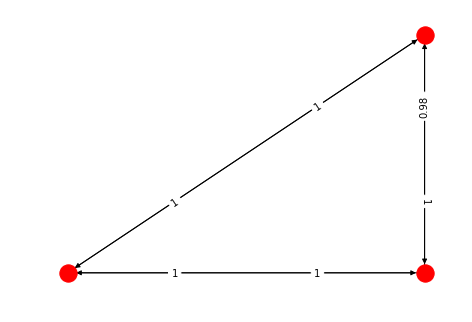

In [29]:
pos=nx.get_node_attributes(G,'pos')
nx.draw(G,pos)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels,label_pos=.3)

In [38]:

###BFS
def bfs(graph, s, f):
    
    layer = []
    next_layer = []
    D = {'key':'value'}
    D[s]=[0,1]
    next_layer.append(s)
    terminate = False
    
    while not terminate:
        layer = next_layer
        next_layer = []
        ###iterate through every node in this layer
        for u in layer: 
            ####iterate through its neighbors
            for v in graph[u]:
                ###if not visited add to the dictionary
                if D.get(v) is None:
                    D[v] = [D.get(u)[0]+1 ,D.get(u)[1]]
                    ####add to the next layer to be discovered
                    next_layer.append(v)
                ####if this node was visited, but in the same layer, add to the inbound count 
                elif D.get(v)[0] == D.get(u)[0]+1:
                    D[v] = [D.get(v)[0], D.get(v)[1]+D.get(u)[1]]
                if v == f:
                    ####if we visited the last layer then stop after this
                    terminate = True
    return D[f]

In [30]:
yo = [0,1]

In [33]:
yo[1]

1

In [39]:
bfs(G2,1,9)

[4, 5]

In [67]:
G2[5]

AtlasView({2: {}, 3: {}, 6: {}, 7: {}})

{1: Text(1,-0.0261744,'1'),
 2: Text(0.537824,-0.176341,'2'),
 3: Text(0.6359,0.167524,'3'),
 4: Text(0.175453,-0.530009,'4'),
 5: Text(0.0925654,0.0975979,'5'),
 6: Text(-0.260098,-0.256455,'6'),
 7: Text(-0.488691,0.323434,'7'),
 8: Text(-0.959246,0.380587,'8'),
 9: Text(-0.733706,0.0198375,'9')}

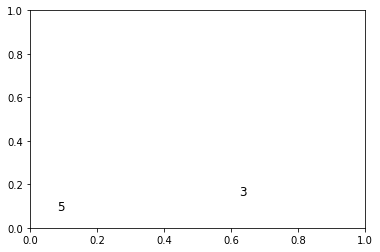

In [15]:
nx.draw_networkx_labels(G2,pos=nx.spring_layout(G2))

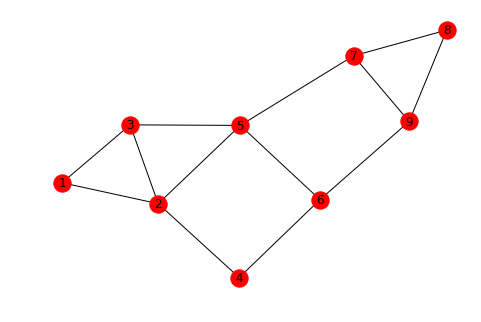

In [17]:
nx.draw(G2,with_labels=True)